<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [77]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib as plt
import statsmodels.api as sm
from __future__ import division


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [120]:
sat_data_csv = './sat_scores.csv'
#reader = csv.reader(open(sat_data_csv))
# keys = reader.readline()

reader = csv.DictReader(open(sat_data_csv))

math = []
state = []
rate = []
verbal = []

for row in reader:
    math.append(row['Math'])
    state.append(row['State'])
    rate.append(row['Rate'])
    verbal.append(row['Verbal'])

sat_scoresnormal = {}
    
sat_scoresnormal['Math'] = math
sat_scoresnormal['State'] = state
sat_scoresnormal['Rate'] = rate
sat_scoresnormal['Verbal'] = verbal

#sat_scoresnormal

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [36]:
sat_scoresdict = pd.DataFrame.from_dict(sat_scoresnormal)

sat_scores = pd.read_csv(sat_data_csv)
print(sat_scoresdict.dtypes)
print(sat_scores.dtypes)

# Differences seen in type of values.  The pd.read_csv function automatically converts to most suitable value type

Math      object
Rate      object
State     object
Verbal    object
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
# Initialize empty dictionary for storing values
datadict = {}

# Use a for loop to iterate through column names and save to dictionary
for i, col in enumerate(sat_scores.columns):

    # Initialize temporary dictionary to be attached to master data dictionary
    tempdict = {}
    
    # Assign tempdict description variables of column
    tempdict['Name'] = col
    tempdict['Types'] = sat_scores[col].dtypes
    tempdict['Description'] = 'This is the ' + str(col + ' column')
    tempdict['Shape'] = sat_scores[col].shape
    
    # Append column details to datadict
    datadict[i] = tempdict

datadict

{0: {'Description': 'This is the State column',
  'Name': 'State',
  'Shape': (52,),
  'Types': dtype('O')},
 1: {'Description': 'This is the Rate column',
  'Name': 'Rate',
  'Shape': (52,),
  'Types': dtype('int64')},
 2: {'Description': 'This is the Verbal column',
  'Name': 'Verbal',
  'Shape': (52,),
  'Types': dtype('int64')},
 3: {'Description': 'This is the Math column',
  'Name': 'Math',
  'Shape': (52,),
  'Types': dtype('int64')}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

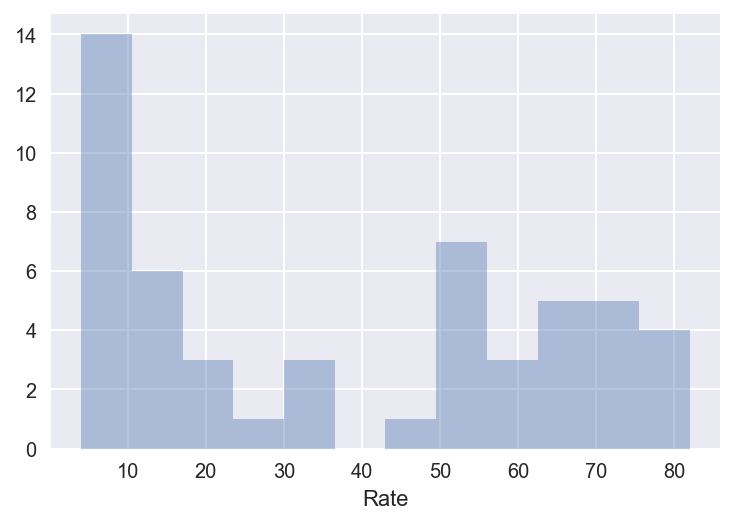

In [6]:
sns.distplot(sat_scores['Rate'], bins = 12, kde=False)

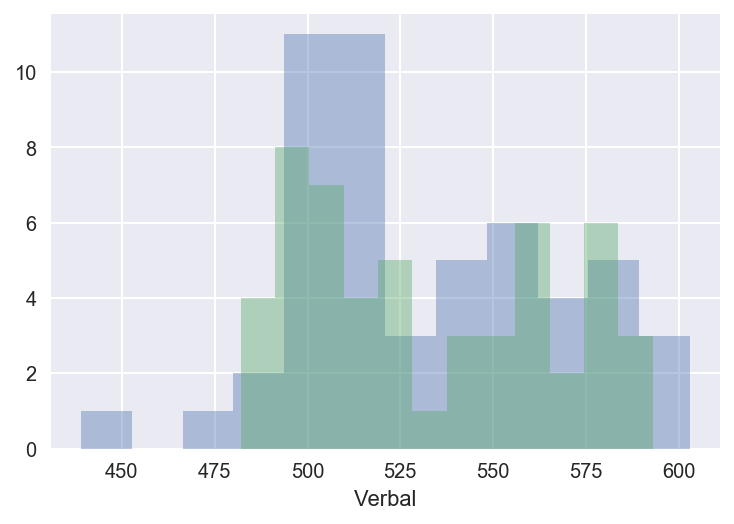

In [7]:
sns.distplot(sat_scores['Math'], bins = 12, kde=False)
sns.distplot(sat_scores['Verbal'], bins = 12, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

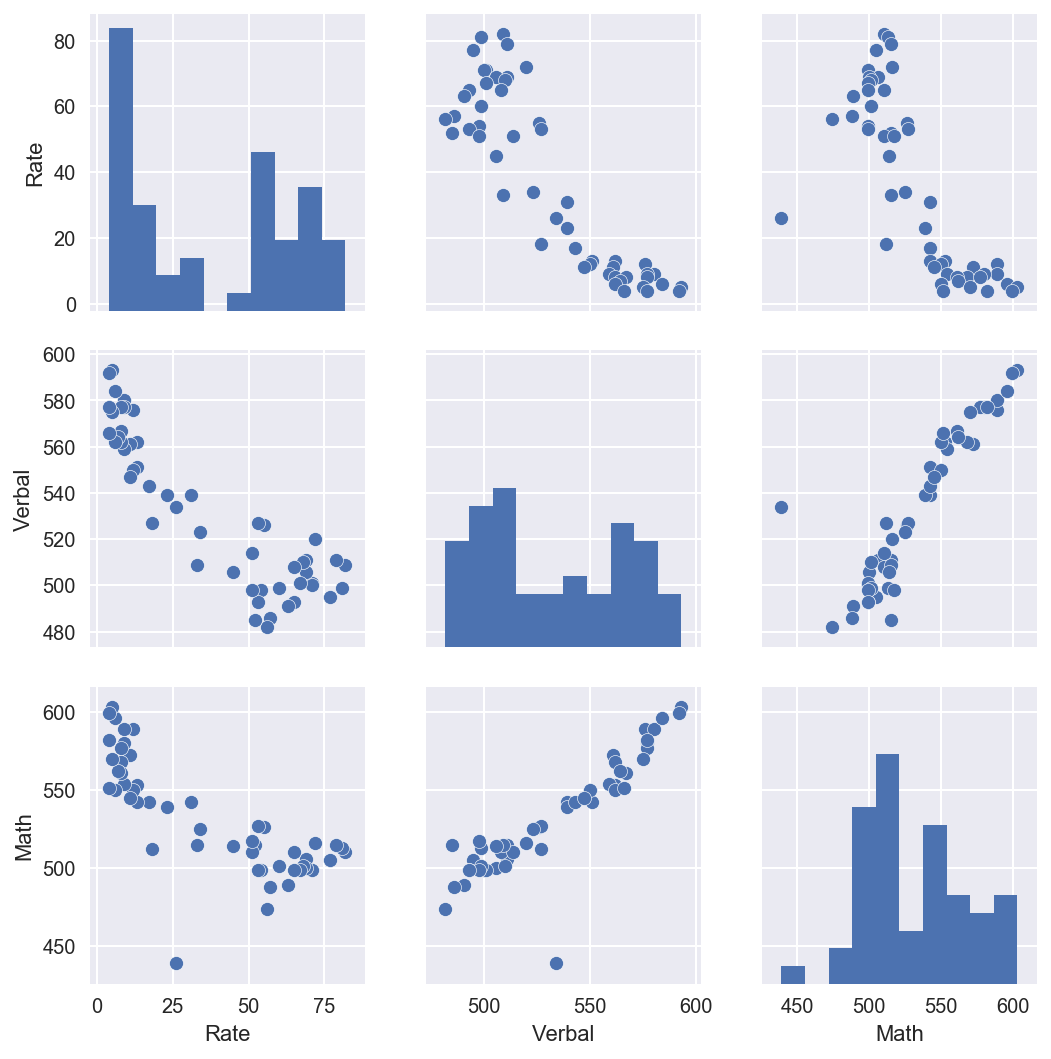

In [8]:
sns.pairplot(sat_scores)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

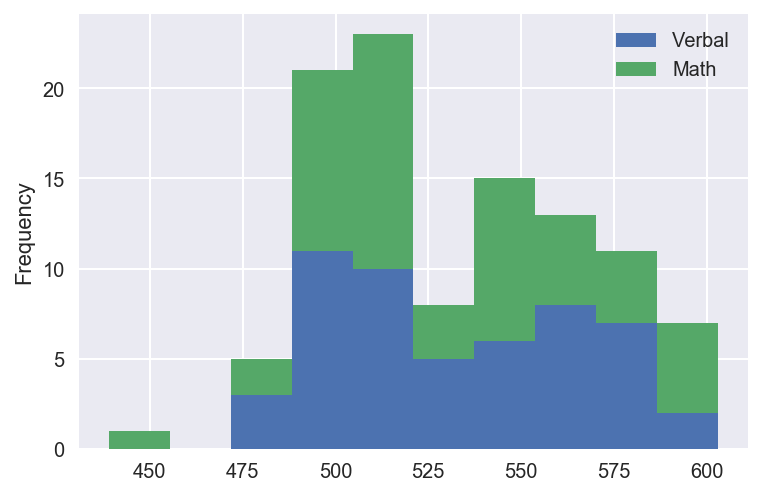

In [9]:
sat_scores.loc[0:,['Verbal', 'Math']].plot(kind='hist', stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

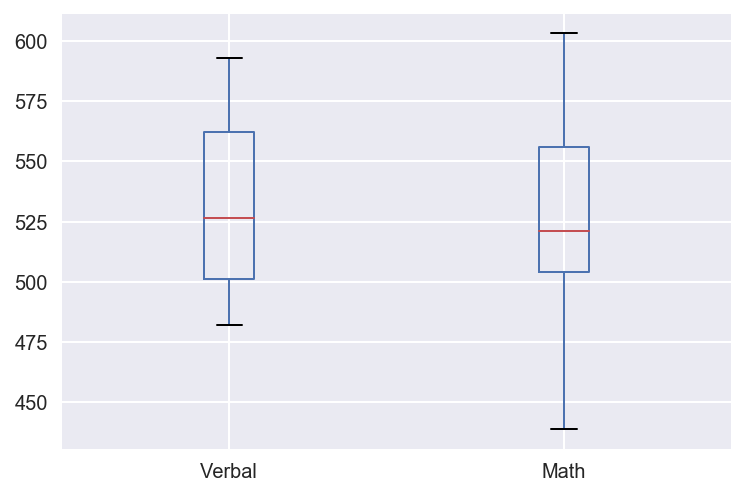

In [10]:
sat_scores.loc[0:,['Verbal', 'Math']].plot(kind='box')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


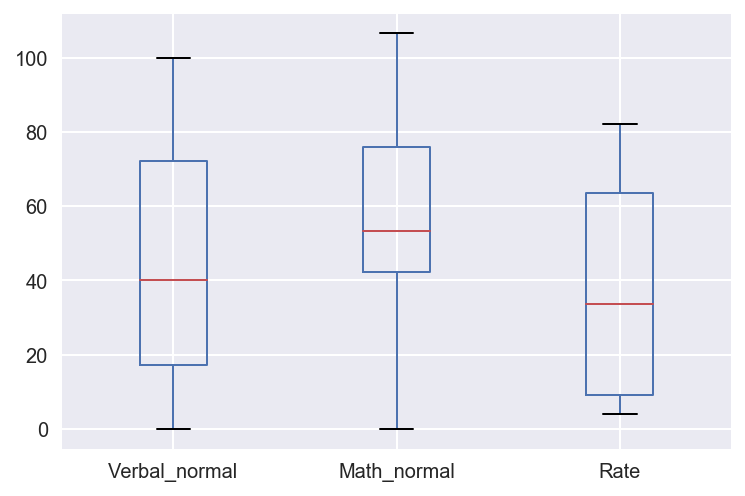

In [82]:
# Set minimum and maximum threshold for both verbal and math columns
minverb=sat_scores['Verbal'].min()
maxverb=sat_scores['Verbal'].max()
minmath=sat_scores['Math'].min()
maxmath=sat_scores['Math'].max()

# Declare new lists to be appended for new columns
newVerbal = []
newMath = []

# Iterate through verbal, normalizing values and storing in newVerbal
for i in sat_scores['Verbal']:
    numerator = i - minverb
    #print(numerator)
    denom = maxverb - minverb
    #print(denom)
    newVerbal.append((numerator/denom)*100)

# Iterate through math, normalizing values and storing in newMath
for i in sat_scores['Math']:
    numerator = i - minmath
    denom = maxverb - minmath
    newMath.append((numerator / denom)*100)
    
# Assign the normalized values to new columns: Math_normal and Verbal_normal
sat_scores['Math_normal'] = newMath
sat_scores['Verbal_normal'] = newVerbal

# Graph normalized Verbal and Math scores with Rate
sat_scores.loc[0:,['Verbal_normal', 'Math_normal', 'Rate']].plot(kind='box')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [117]:
# Initialize new Dataframe without All row/observation
sat_wout_all = sat_scores.drop(51)

# Find mean of Verbal column and assign: averageVerbal
averageVerbal = np.mean(sat_wout_all['Verbal'])
print('The average verbal score was: ' + str(averageVerbal))

# Assign to greaterAverage the sat_scores table including only Verbal sat scores greater than averageVerbal
greaterAverage = sat_wout_all[sat_wout_all['Verbal'] > averageVerbal]

# Print output
print(greaterAverage.head())
greaterAverage.shape


The average verbal score was: 532.529411765
   State  Rate  Verbal  Math  Math_normal  Verbal_normal  \
26    CO    31     539   542    66.883117      51.351351   
27    OH    26     534   439     0.000000      46.846847   
28    MT    23     539   539    64.935065      51.351351   
30    ID    17     543   542    66.883117      54.954955   
31    TN    13     562   553    74.025974      72.072072   

    Difference_Verbal-Math  
26                      -3  
27                      95  
28                       0  
30                       1  
31                       9  


(24, 7)

## Conclusion of verbal mean
There are 24 states with greater verbal scores than the average.  This tells us that the distribution is fairly balanced as there are roughly half of the states above the mean

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [116]:
# Find mean of Verbal column and assign: averageVerbal
medVerbal = np.median(sat_wout_all['Verbal'])
print('The average verbal score was: ' + str(medVerbal))

# Assign to greaterAverage the sat_scores table including only Verbal sat scores greater than averageVerbal
greaterMed = sat_wout_all[sat_wout_all['Verbal'] > medVerbal]

# Print output
print(greaterMed.head())
greaterMed.shape

The average verbal score was: 527.0
   State  Rate  Verbal  Math  Math_normal  Verbal_normal
26    CO    31     539   542    66.883117      51.351351
27    OH    26     534   439     0.000000      46.846847
28    MT    23     539   539    64.935065      51.351351
30    ID    17     543   542    66.883117      54.954955
31    TN    13     562   553    74.025974      72.072072


(24, 6)

The lists are similar, both with 24 rows. The mean was slightly greater than the median indicating a slight positive skew. Although the mean and median were slightly different, the difference wasn't significant enough to result in a different table being generated

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [91]:
# Create new column with the values of sat_scores Verbal minus Math
sat_scores['Difference_Verbal-Math'] = sat_scores['Verbal'] - sat_scores['Math']

# Output head of sat_scores
print(sat_scores.head())

  State  Rate  Verbal  Math  Math_normal  Verbal_normal  \
0    CT    82     509   510    46.103896      24.324324   
1    NJ    81     499   513    48.051948      15.315315   
2    MA    79     511   515    49.350649      26.126126   
3    NY    77     495   505    42.857143      11.711712   
4    NH    72     520   516    50.000000      34.234234   

   Difference_Verbal-Math  
0                      -1  
1                     -14  
2                      -4  
3                     -10  
4                       4  


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [97]:
# Sort values in sat_scores by Difference (descending order). Slice to include first 10 only : greatestDiff
greatestDiff = (sat_scores.sort_values(['Difference_Verbal-Math'], ascending=False))[0:10]

# Sort values in sat_scores by Difference (descending order). Slice to include first 10 only : greatestDiff
lowestDiff = (sat_scores.sort_values(['Difference_Verbal-Math'], ascending=True))[0:10]

# Print output
print('The Greatest Difference in Verbal and Math Scores (Verbal>Math)\n')
print(greatestDiff.head(3))
print('The Greatest Difference in Verbal and Math Scores (Math>Verbal)\n')
print(lowestDiff.head(3))

The Greatest Difference in Verbal and Math Scores (Verbal>Math)

   State  Rate  Verbal  Math  Math_normal  Verbal_normal  \
27    OH    26     534   439     0.000000      46.846847   
50    MS     4     566   551    72.727273      75.675676   
29    WV    18     527   512    47.402597      40.540541   

    Difference_Verbal-Math  
27                      95  
50                      15  
29                      15  
The Greatest Difference in Verbal and Math Scores (Math>Verbal)

   State  Rate  Verbal  Math  Math_normal  Verbal_normal  \
21    HI    52     485   515    49.350649       2.702703   
23    CA    51     498   517    50.649351      14.414414   
1     NJ    81     499   513    48.051948      15.315315   

    Difference_Verbal-Math  
21                     -30  
23                     -19  
1                      -14  


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [13]:
sat_scores.corr(method='pearson')

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


Verbal and Math have a strong positive correlation. Wheras both Math and Verbal have negative correlations with the Rate.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [14]:
sat_scores.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


# Analysis
* The count indicates the number of rows
* The mean indicates a similar average for math and verbal scores with a mean rate of 37%
* The std shows that Math values are more disperse than Verbal, however, the values are still fairly close.
* The percentiles indicate that 50% of our data is considered below the mean.  This indicates that there must be a slight positive skew on Verbal, Math, and Rate data. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [4]:
file = './drug-use-by-age.csv'
drugdata = pd.read_csv(open(file))

# Replace null values (-) with Python recognizable nan
drugdata.replace(to_replace = '-', value = np.nan, inplace = True)

# Individually check unique values and convert object if deemed float
drugdata['cocaine-frequency'] = drugdata['cocaine-frequency'].astype(float)
drugdata['crack-frequency'] = drugdata['crack-frequency'].astype(float)
drugdata['heroin-frequency'] = drugdata['heroin-frequency'].astype(float)
drugdata['inhalant-frequency'] = drugdata['inhalant-frequency'].astype(float)
drugdata['oxycontin-frequency'] = drugdata['oxycontin-frequency'].astype(float)
drugdata['meth-frequency'] = drugdata['meth-frequency'].astype(float)

# Converts age column to get rid of -'s and +'s and converts to float
drugdata['age'] = drugdata['age'].str.replace('-', '.').str.replace('+', '').astype(float)
drugdata.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12.0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13.0,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14.0,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15.0,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16.0,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [122]:
drugdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null float64
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycon

* Using .info() we are able to view information for the dataframe.   
* The dataframe is 17 rows by 28 columns.  It appears that there are a few nan variables within cocaine, crack, heroin, inhalant, oxycontin, and meth-frequency columns. These have been determined as nan values
* The remaining columns hold 17 non-null objects/floats/ints.
* There should be no impact on our approach to EDA on this dataset.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [24]:
drugdata.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [123]:
usage = pd.DataFrame(drugdata, columns = ['age', 'alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 
                     'hallucinogen-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use',
                                         'meth-use', 'sedative-use','inhalant-use'])
frequency = pd.DataFrame(drugdata, columns = ['age', 'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 
                         'crack-frequency', 'hallucinogen-frequency', 'pain-releiver-frequency', 'oxycontin-frequency',
                         'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency',
                            'inhalant-frequency'])

#sns.pairplot(usage)
#sns.pairplot(frequency)

print(frequency.head())
print(usage.head())

    age  alcohol-frequency  marijuana-frequency  cocaine-frequency  \
0  12.0                3.0                  4.0                5.0   
1  13.0                6.0                 15.0                1.0   
2  14.0                5.0                 24.0                5.5   
3  15.0                6.0                 25.0                4.0   
4  16.0               10.0                 30.0                7.0   

   crack-frequency  hallucinogen-frequency  pain-releiver-frequency  \
0              NaN                    52.0                     36.0   
1              3.0                     6.0                     14.0   
2              NaN                     3.0                     12.0   
3              9.5                     4.0                     10.0   
4              1.0                     3.0                      7.0   

   oxycontin-frequency  tranquilizer-frequency  stimulant-frequency  \
0                 24.5                    52.0                  2.0   
1         

# Using pairplot, Correlations were found:

## USAGE: Positive correlations between:
* marijuana use with: hallucinogen, pain releiver, oxycontin, tranq, stimulant, and meth use
* cocaine use with: pain-releiver, oxycontin, tranq, and meth use
* hallucinogen use with: pain releiver, oxycontin, and stimulant use
* pain releiver use with: oxycontin, tranq, stimulant, and meth use
* oxycontin use with: tranq, stimulant, meth, and sedative use
* tranq use with: stimulant and meth use
* inhalant use doesn't correlate with any other drug well

## FREQUENCY
* A slight correlation was found between marijuana and alcohol frequency. Increased frequency of marijuana use tends to also result in increased alcohol frequency of use.  The reverse is not as true.  
* The rest seem uncorrelated.

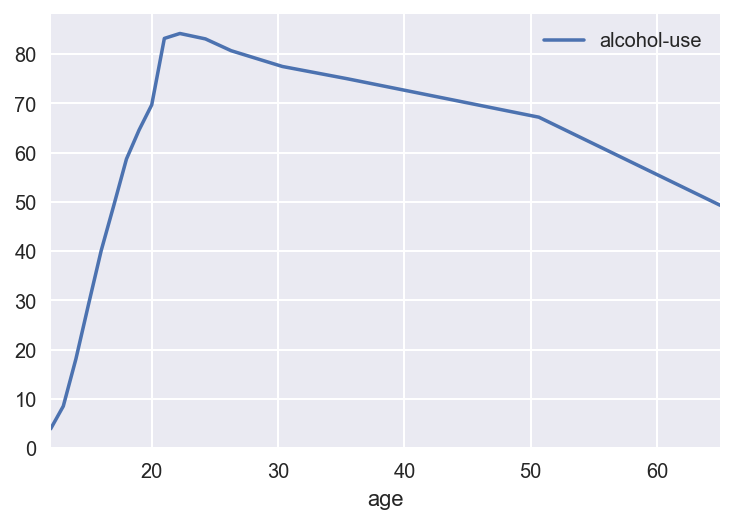

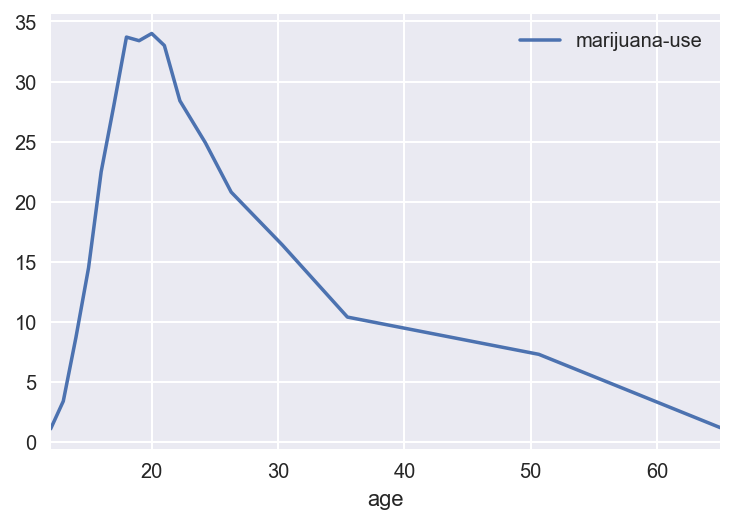

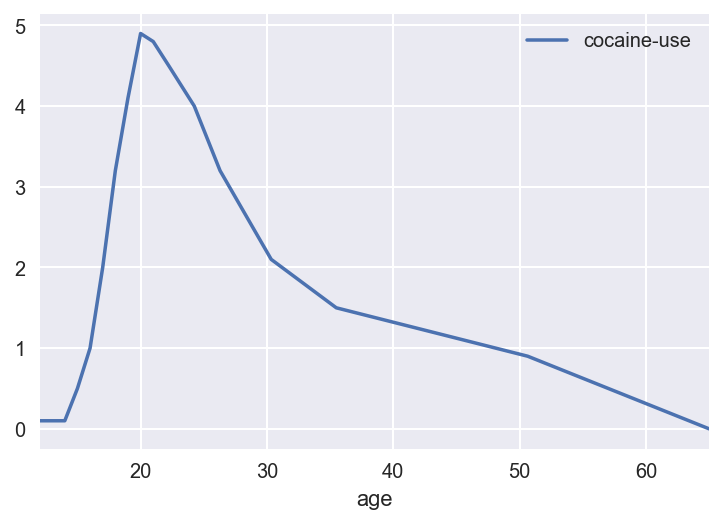

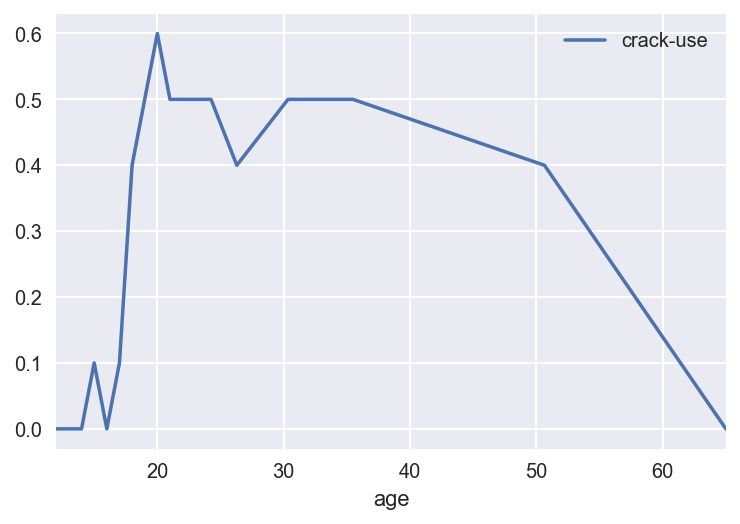

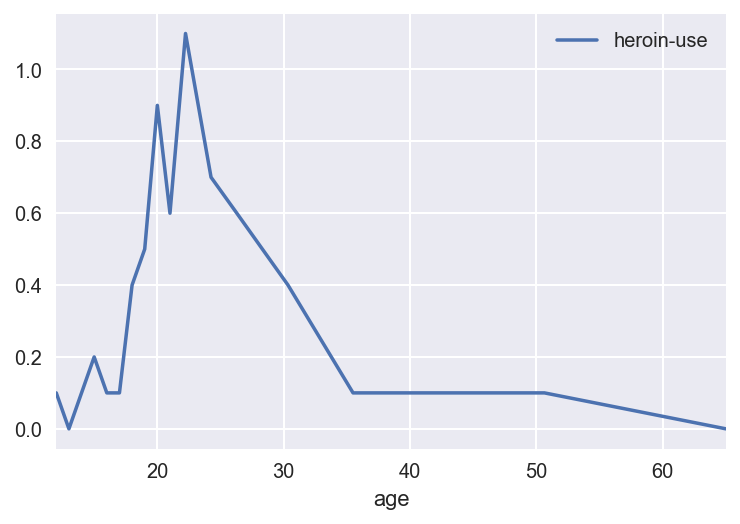

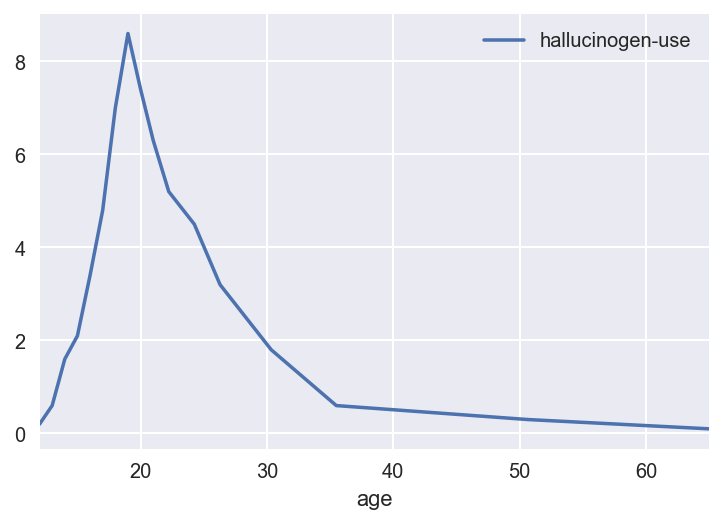

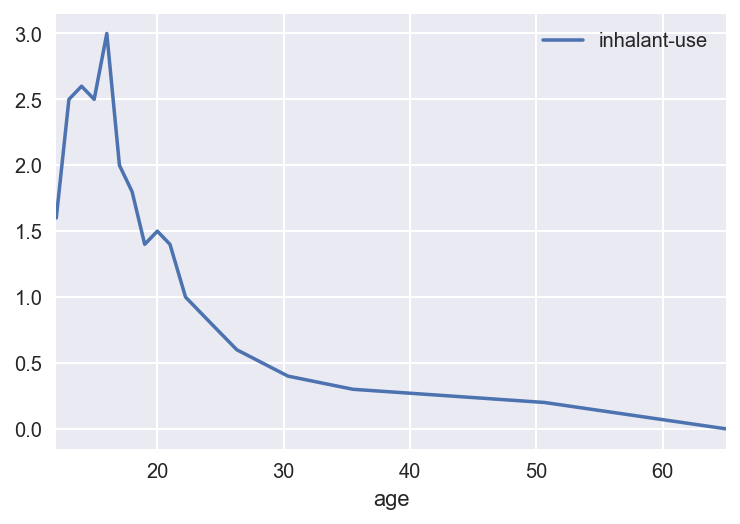

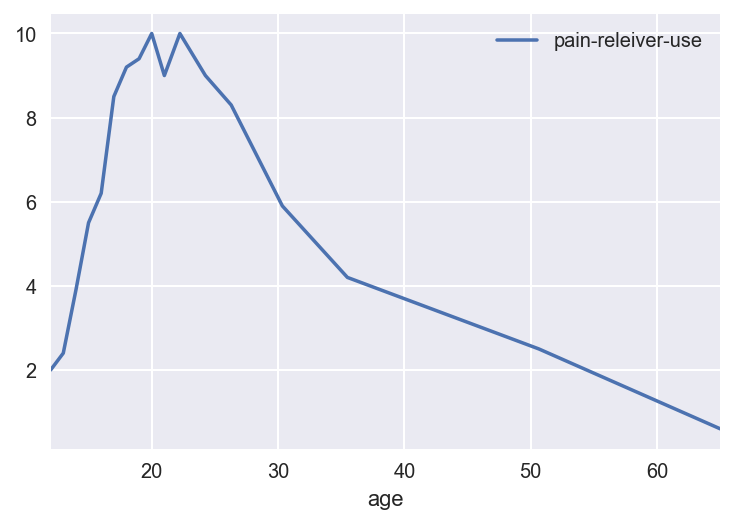

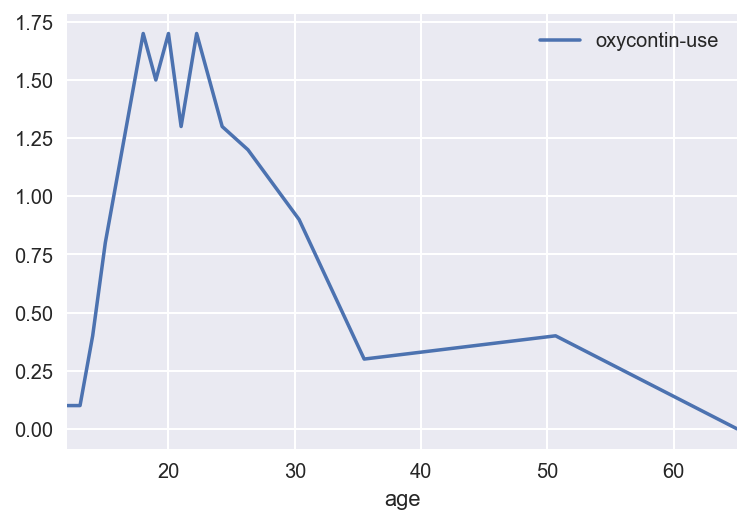

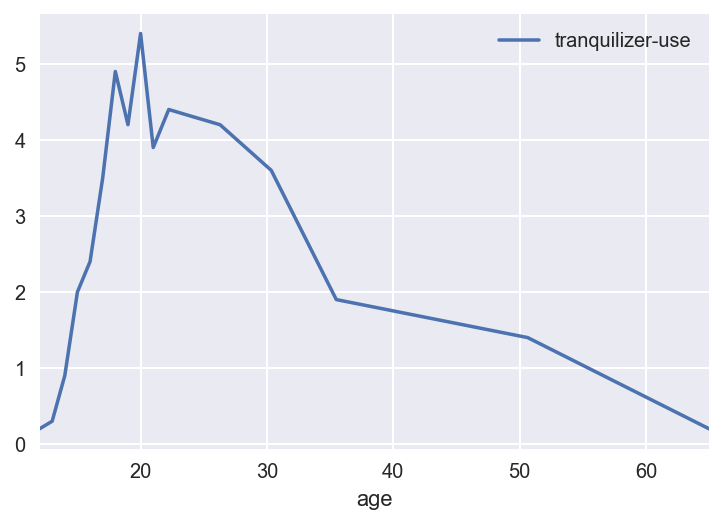

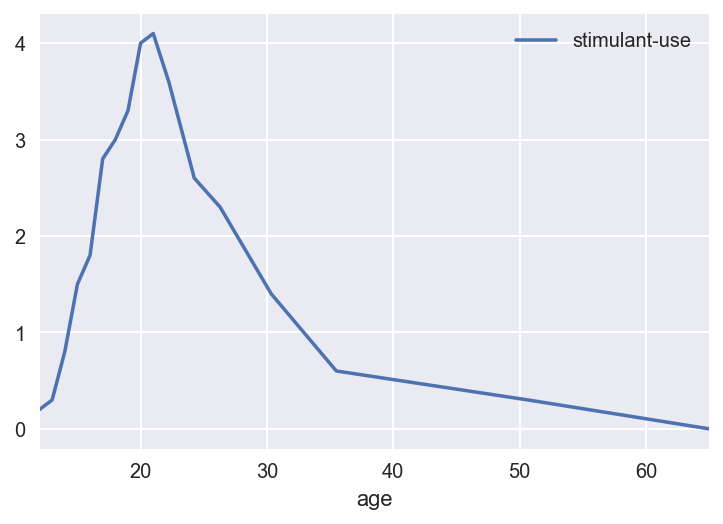

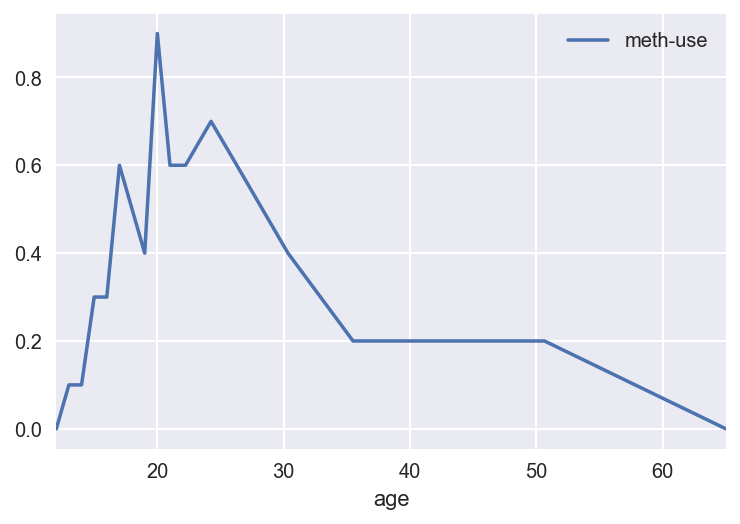

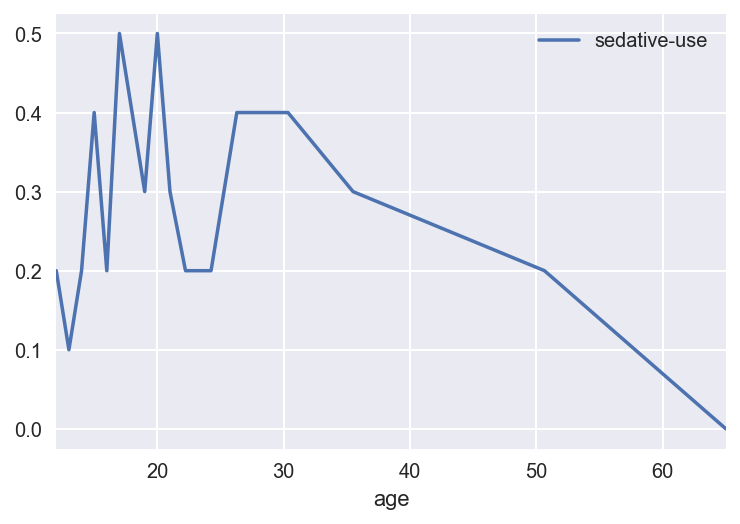

In [35]:
# Below is an analysis of the relationship between age and drug use

drugdata.plot(x='age', y='alcohol-use')
drugdata.plot(x='age', y='marijuana-use')
drugdata.plot(x='age', y='cocaine-use')
drugdata.plot(x='age', y='crack-use')
drugdata.plot(x='age', y='heroin-use')
drugdata.plot(x='age', y='hallucinogen-use')
drugdata.plot(x='age', y='inhalant-use')
drugdata.plot(x='age', y='pain-releiver-use')
drugdata.plot(x='age', y='oxycontin-use')
drugdata.plot(x='age', y='tranquilizer-use')
drugdata.plot(x='age', y='stimulant-use')
drugdata.plot(x='age', y='meth-use')
drugdata.plot(x='age', y='sedative-use')


# Drug use correlation with age:

## Alcohol:
* Alcohol use increases with age, reaching a peak between the ages of 21-23 (Use at 80-85%). This gradually decreases until the age of 50, where the decrease becomes more significant. Negatively skewed
    
## Marijuana:
* Marijuana use also increases with age till the age of approx. 21, where use is at 33-34%, before decreasing. 
* Use is still at 10% when age is 35-49.

## Cocaine:
* Cocaine use gradually reaches peak at the age of 20, at close to 50% of the sample using the drug. It then decreases slowly, reducing to 20% use at approx. 32-34 years old.

## Crack:
* Similarly, the peak is at 20 (6% use at age). However, use only decreases slightly, and plateaus between the age of 21 and approximately 4.9%, before dramatically decreasing.

## Heroin:
* There are two obvious peaks when graphing heroin use over age. The first peak occurs at age 20, before reaching a strange data point of greater than 10% of usage among age group 22-23.

## Hallucinogen:
* Hallucinogen use is highest at the age of 19 with a usage of 80% at this age

## Inhalant:
* Inhalant use is small overall, reaching a peak of 3% at the age of 16.  Unlike others, its use is in the early years, before decreasing gradually.  Overall, usage is low across age groups

## Pain Releiver:
* Peaks occur between age of 20 and 23 at 100% of use.  This then decreases gradually.  It's still at 40% use at the age of 35-49

## Oxycontin:
* Oxycontin use begins at a young age, gradually hovering around peaks between 18 and 23 years old.  This drastically decreases after peak, with levels between 25-40% above ages 35


## Tranquilizer:
* Tranquilizer use increases and reaches peak at the age of 20 with use over 50%. Use decreases after, being just under 20% use at 35 years of age.

## Stimulant:
* Stimulant use peaks at the age of 21 with over 4% use. Use is approx. 7% at the age of 35+


## Meth:
* The peak is at the age group of 20, with 8.5% use


## Sedative:
* Sedative use isn't stable, increasing and decreasing erratically.  The two highest peaks are at ages of 17 and 20, where use is at 5%.  Stimulant use is still used at older ages, with use of 3% at age group 35-49.

# Conclusion:
* Most drug-use peaks between the ages of 19-23 years old

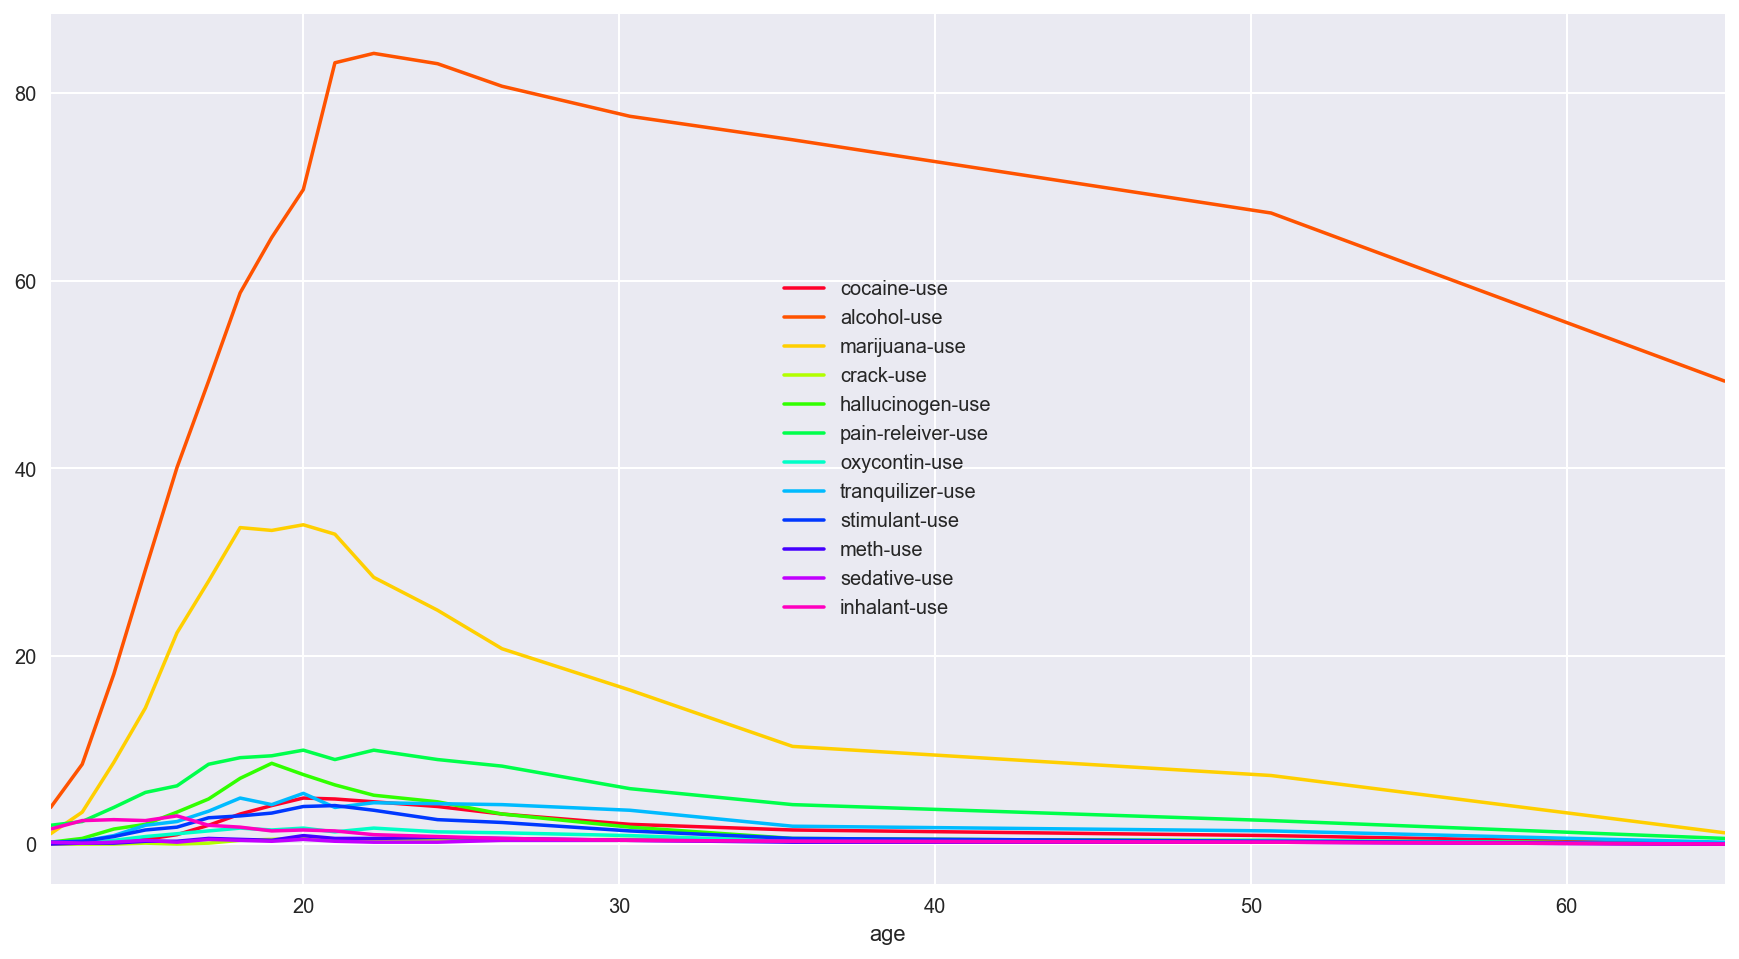

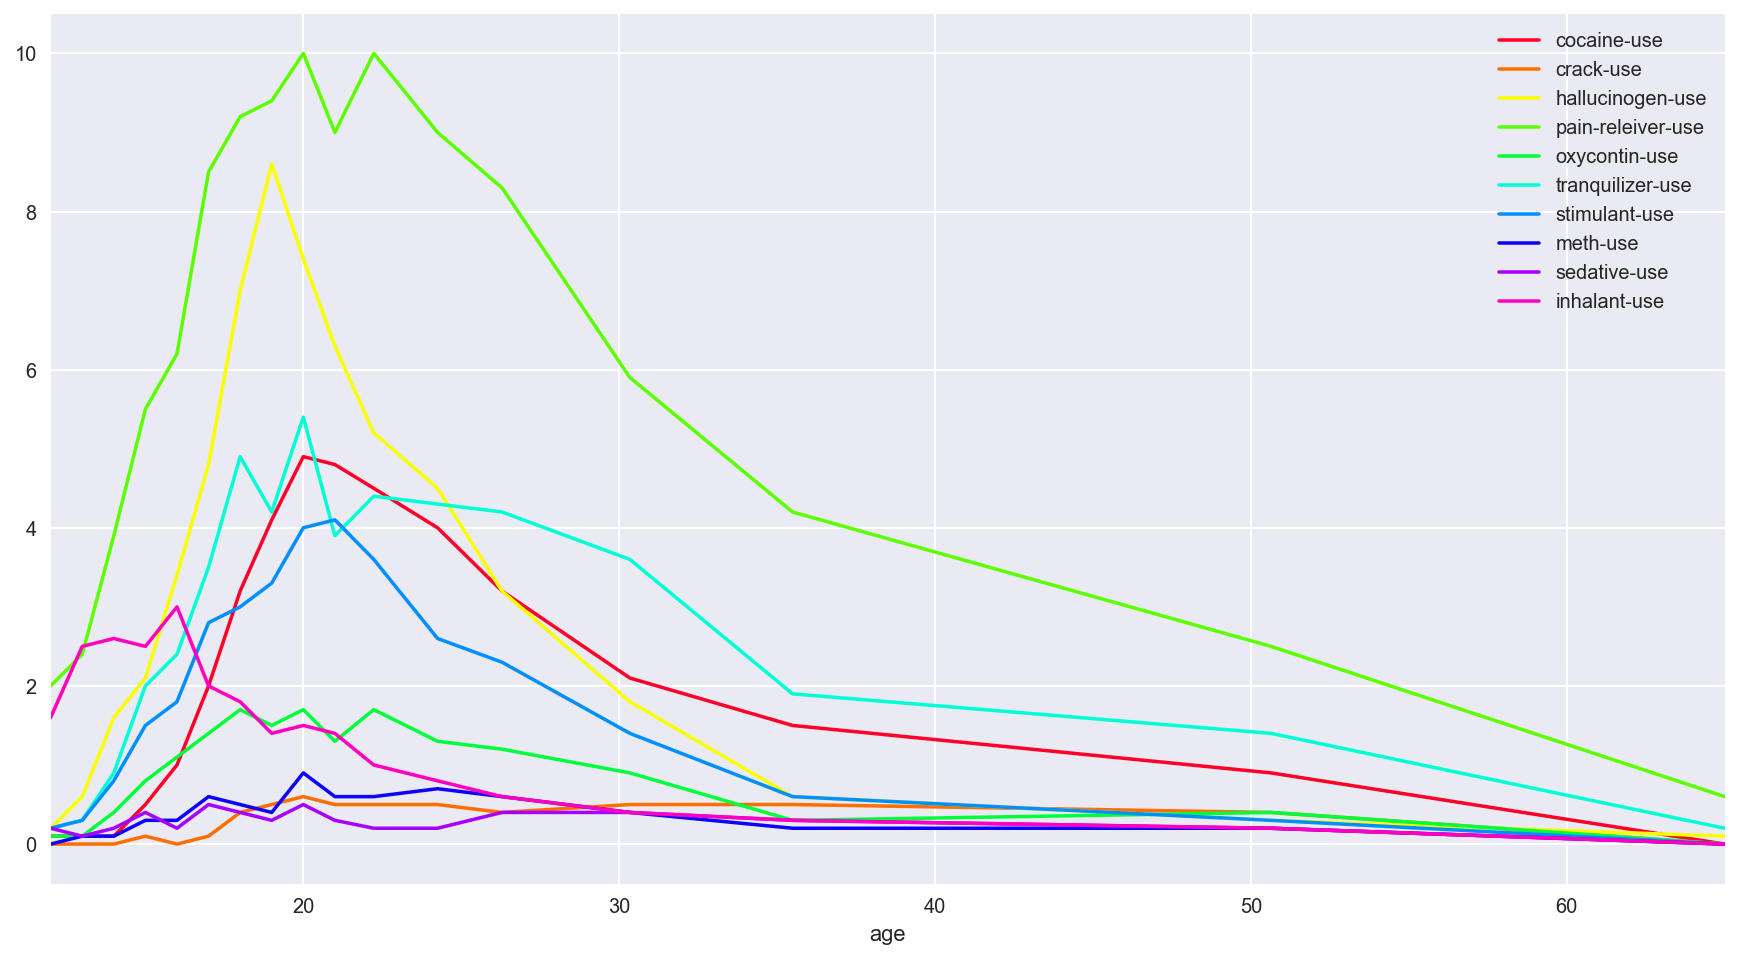

In [9]:
# All drugs graphed together by age
drugdata.loc[:, ['age', 'cocaine-use', 'alcohol-use', 'marijuana-use', 'crack-use', 'hallucinogen-use', 'pain-releiver-use', 
                'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use', 
                'inhalant-use']].plot(x='age', figsize=[15,8], colormap='gist_rainbow')

# Without alcohol and marijuana
drugdata.loc[:, ['age', 'cocaine-use', 'crack-use', 'hallucinogen-use', 'pain-releiver-use', 
                'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use', 
                'inhalant-use']].plot(x='age', figsize=[15,8], colormap='gist_rainbow')

In [49]:
# Created dataframes were graphed using below plot and pairplot

stimulant = pd.DataFrame(drugdata, columns=['stimulant-use','stimulant-frequency'])
sedative = pd.DataFrame(drugdata, columns=['sedative-use','sedative-frequency'])
alcohol = pd.DataFrame(drugdata, columns=['alcohol-use','alcohol-frequency'])
marijuana = pd.DataFrame(drugdata, columns=['marijuana-use','marijuana-frequency'])
halluc = pd.DataFrame(drugdata, columns=['hallucinogen-use','hallucinogen-frequency'])
painrel = pd.DataFrame(drugdata, columns=['pain-releiver-use','pain-releiver-frequency'])

#sns.pairplot(x_vars= cocaine['cocaine-use'], y_vars= cocaine['cocaine-frequency'], markers='.', dropna=True)
#drugdata.plot(x='cocaine-use', y='cocaine-frequency', dropna=True)



# Below were unable to be graphed, and a Pearson correlation calculated instead

print('The correlation between oxycontin use and frequency is: ' + 
      str(drugdata['oxycontin-use'].corr(drugdata['oxycontin-frequency'])))

print('The correlation between tranquilizer use and frequency is: ' +
        str(drugdata['tranquilizer-use'].corr(drugdata['tranquilizer-frequency'])))

print('The correlation between meth use and frequency is: ' +
        str(drugdata['meth-use'].corr(drugdata['meth-frequency'])))

print('The correlation between inhalant use and frequency is: ' +
        str(drugdata['inhalant-use'].corr(drugdata['inhalant-frequency'])))

print('The correlation between crack use and frequency is: ' +
        str(drugdata['crack-use'].corr(drugdata['crack-frequency'])))

print('The correlation between cocaine use and frequency is: ' +
        str(drugdata['cocaine-use'].corr(drugdata['cocaine-frequency'])))

The correlation between oxycontin use and frequency is: -0.28828745712
The correlation between tranquilizer use and frequency is: -0.388953847793
The correlation between meth use and frequency is: -0.184711978153
The correlation between inhalant use and frequency is: -0.0906205059359
The correlation between crack use and frequency is: 0.173208333856
The correlation between cocaine use and frequency is: -0.163922061442


# Graphed Relationship Correlations between use and frequency

## Stimulant
* No correlation found between stimulant use and frequency of use. High use by a particular age group, doesn't necessarily result in higher frequency.

## Sedative
* There is no connection between portion of age group that uses sedatives and the frequency of their use within the age group.

## Alcohol
* When alcohol use is high in an age group, it's likely that so too will frequency within the year

## Marijuana
* Use and frequency don't have a strong correlation

## Hallucinogen
* Hallucinogen use has no correlation with frequency

## Pain Releiver
* A weak negative relationship between use and frequency. 



### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

# Question: 
Is there a correlation between alcohol frequency of use and marijuana frequency of use?

# Deliverables: 
After looking into correlation between the frequency of use for both drugs, we will be able to ascertain the correlation between them using Pearson and plots.  From this we are able to find whether or not an increased frequency of drinking or smoking marijuana, has an impact on each other.

# Hypothesis
### H0: There is no correlation between the frequency of use of Marijuana and Alcohol
### H1: There is a correlation between the frequencies of use for both Marijuana and Alcohol.

**Report**



...

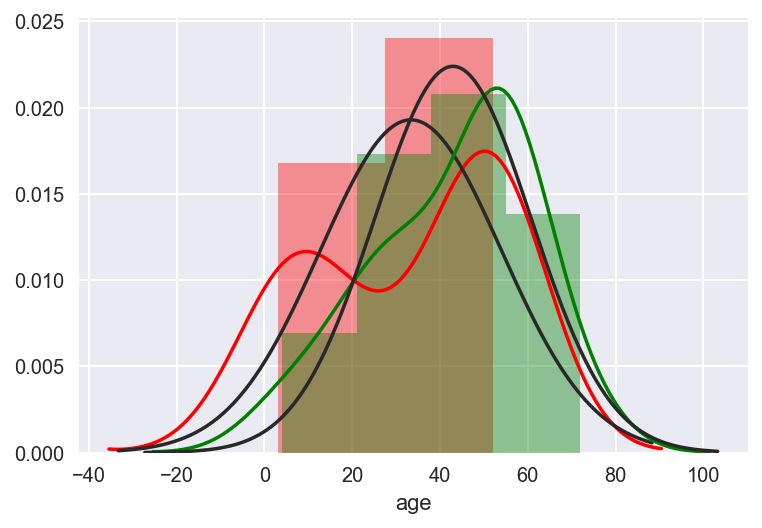

In [17]:
sns.distplot(drugdata['alcohol-frequency'], kde=True, fit = stats.norm, color='r')
sns.distplot(drugdata['marijuana-frequency'], kde=True, fit = stats.norm, color='g', axlabel='age')

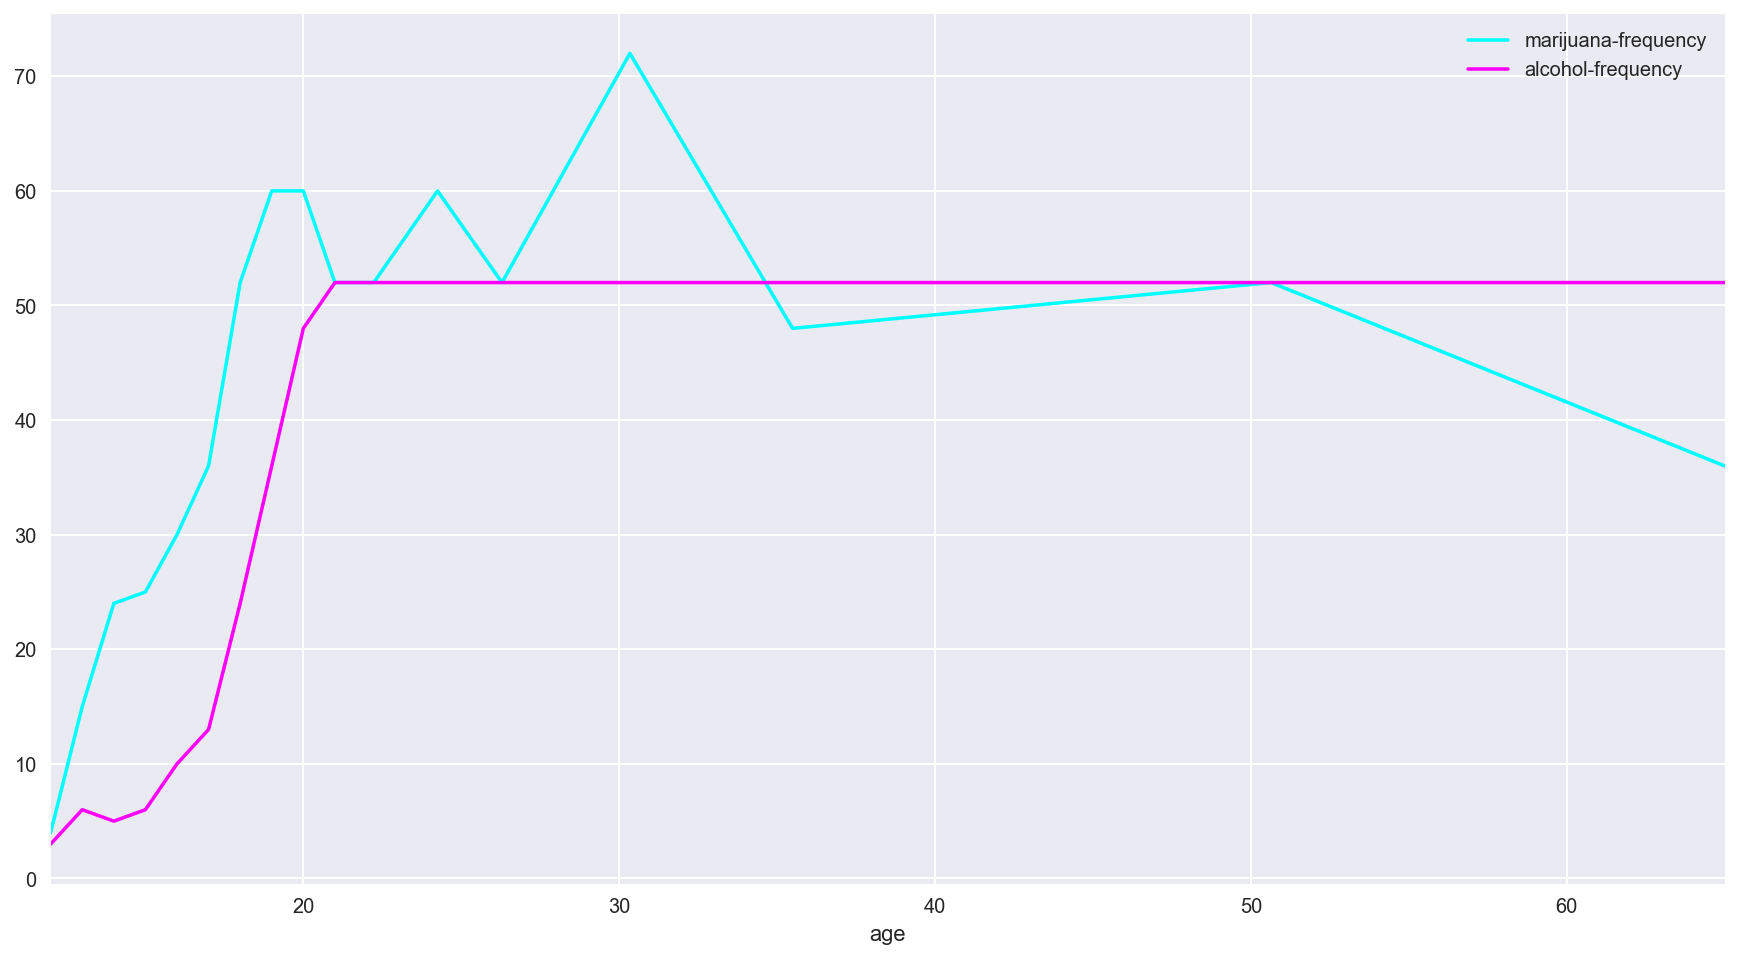

In [29]:
drugdata.loc[:, ['age', 'marijuana-frequency', 'alcohol-frequency']].plot(x='age', figsize=[15,8], colormap='cool')

In [99]:
print("The correlation between frequency of use for marijuana and alcohol is: " +
      str( drugdata['alcohol-frequency'].corr(drugdata['marijuana-frequency'])))
#print(np.corrcoef(drugdata['marijuana-frequency'], y = drugdata['alcohol-frequency']))

The correlation between frequency of use for marijuana and alcohol is: 0.818768502799


In [115]:
c, p = stats.spearmanr(drugdata.loc[:, ['marijuana-frequency', 'alcohol-frequency']])
print('The correlation between Marijuana and Alcohol frequency is: \nCorrelation: {} \nP-Value: {}'.format(c,p))

The correlation between Marijuana and Alcohol frequency is: 
Correlation: 0.706856959617 
P-Value: 0.00151018139172


The P-value tells us that there is a statistically significant correlation between the two variables.

## Thus, we accept the alternate hypothesis: 
### H1: There appears to be a statistically significant positive relationship between marijuana frequency and alcohol frequency of use.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [100]:
sat_scores.head()

,State,Rate,Verbal,Math,Math_normal,Verbal_normal,Difference_Verbal-Math
0,CT,82,509,510,46.103896,24.324324,-1
1,NJ,81,499,513,48.051948,15.315315,-14
2,MA,79,511,515,49.350649,26.126126,-4
3,NY,77,495,505,42.857143,11.711712,-10
4,NH,72,520,516,50.000000,34.234234,4


In [101]:
sat_scores['Rate'].head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

In [102]:
# Perform calculations: Find median, MAD, and upperlimit
satmedian = sat_scores['Rate'].median()
MADscore = sm.robust.mad(sat_scores['Rate'])
upperlimit = satmedian + MADscore

# Output assigned variables
print(satmedian)
print('Modified z-score is: ' + str(MADscore))

# Lower limit would be negative, so simply use upper limit
print('The upper limit is: ' + str(upperlimit))

33.5
Modified z-score is: 37.0650554626
The upper limit is: 70.5650554626


In [103]:
# Filter sat_scores by results with 'Rate' greater than upper limit to generate outliers DF
outliers = sat_scores[sat_scores['Rate'] > upperlimit]
outliers

,State,Rate,Verbal,Math,Math_normal,Verbal_normal,Difference_Verbal-Math
0,CT,82,509,510,46.103896,24.324324,-1
1,NJ,81,499,513,48.051948,15.315315,-14
2,MA,79,511,515,49.350649,26.126126,-4
3,NY,77,495,505,42.857143,11.711712,-10
4,NH,72,520,516,50.000000,34.234234,4
5,RI,71,501,499,38.961039,17.117117,2
6,PA,71,500,499,38.961039,16.216216,1


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [108]:
sat_scores.corr(method='spearman')

,Rate,Verbal,Math,Math_normal,Verbal_normal,Difference_Verbal-Math
Rate,1.000000,-0.833294,-0.813275,-0.813275,-0.833294,-0.014266
Verbal,-0.833294,1.000000,0.905205,0.905205,1.000000,0.060244
Math,-0.813275,0.905205,1.000000,1.000000,0.905205,-0.239883
Math_normal,-0.813275,0.905205,1.000000,1.000000,0.905205,-0.239883
Verbal_normal,-0.833294,1.000000,0.905205,0.905205,1.000000,0.060244
Difference_Verbal-Math,-0.014266,0.060244,-0.239883,-0.239883,0.060244,1.000000


* According to the Spearman correlation, SAT Math and Verbal have a 0.905205 correlation with eachother signifying a strong positive relationship, as well as close proximity between points
* Rather than gauging correlation like Pearson, the Spearman correlation attempts to gauge the strength of the linear relationship

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.